In [3]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [1]:
import itertools
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans as K

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
from sklearn.linear_model import Ridge
from sklearn.neighbors import NearestNeighbors
import seaborn as sns


standardScaler = StandardScaler()
MMS = MinMaxScaler()

<ipython-input-36-12f035ff6067>:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=Y_class_label, cmap=plt.cm.get_cmap('nipy_spectral', 10))
<ipython-input-36-12f035ff6067>:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(data_pca_5[:, 0], data_pca_5[:, 1], c=Y_class_label, cmap=plt.cm.get_cmap('nipy_spectral', 10))


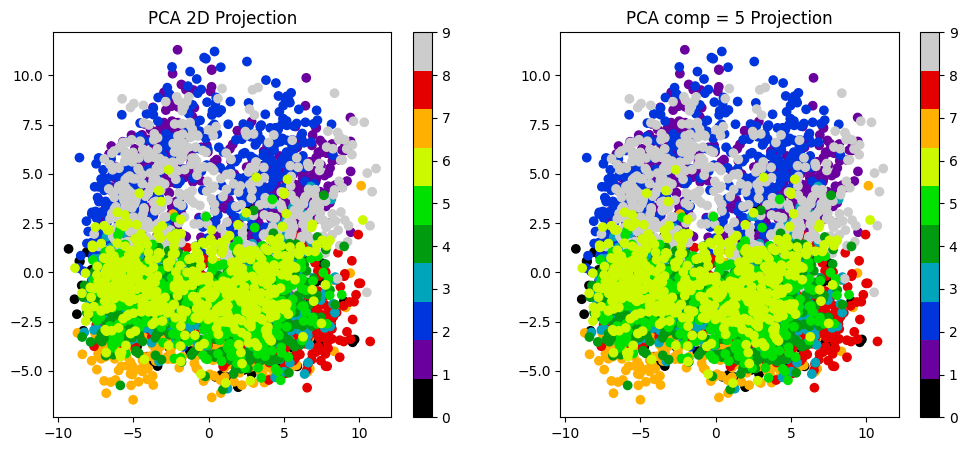

In [36]:
import numpy as np
x_file_path = "/content/drive/My Drive/Colab_Notebooks/FinalProjectData/VMMR_subset_images/train_features.csv"
X = np.loadtxt(x_file_path, delimiter=",")
y_file_path = "/content/drive/My Drive/Colab_Notebooks/FinalProjectData/VMMR_subset_images/train_data.csv"
Y = pd.read_csv(y_file_path, header=None)
Y.columns = ['Col1', 'Col2']
Y_class_label = []
df = pd.DataFrame(Y.values, columns=Y.columns)
first_col = df['Col1']
for i in first_col:
  if(i == "chevrolet_impala_2004-2005"):
    Y_class_label.append(0)
  if(i == "dodge_grand caravan_2005-2006"):
    Y_class_label.append(1)
  if(i == "ford_explorer_2001-2002"):
    Y_class_label.append(2)
  if(i == "honda_accord_2005-2006"):
    Y_class_label.append(3)
  if(i == "nissan_altima_2005-2006"):
    Y_class_label.append(4)
  if(i == "toyota_camry_2002-2003"):
    Y_class_label.append(5)
  if(i == "volkswagen_jetta_2002-2003"):
    Y_class_label.append(6)
  if(i == "ford_mustang_2000-2001"):
    Y_class_label.append(7)
  if(i == "ford_taurus_2002-2003"):
    Y_class_label.append(8)
  if(i == "honda_odyssey_2005-2006"):
    Y_class_label.append(9)

X_train, X_test, y_train, y_test = train_test_split(X, Y_class_label, random_state=0)
# XDf = pd.DataFrame(X)
FifthXTrain = X_train[::5]
# Y_class_label = pd.DataFrame(Y_clas)
FifthYTrain = y_train[::5]

pca_2d = PCA(n_components=2)
data_pca_2d = pca_2d.fit_transform(X)
# tsne = TSNE(n_components=3, random_state=20)
# data_tsne = tsne.fit_transform(X)
pca_5 = PCA(n_components=5)
data_pca_5 = pca_5.fit_transform(X)
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=Y_class_label, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('PCA 2D Projection')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.scatter(data_pca_5[:, 0], data_pca_5[:, 1], c=Y_class_label, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.title('PCA comp = 5 Projection')
plt.colorbar()
plt.show()



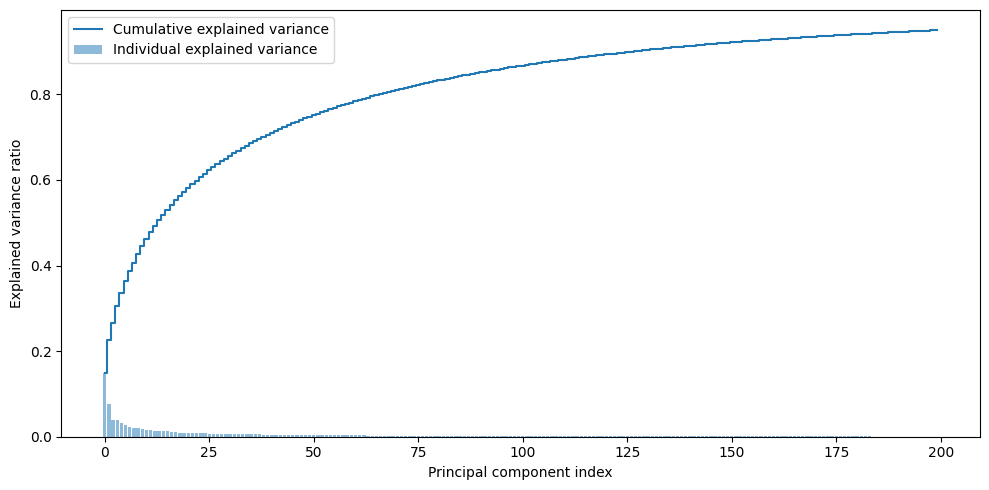

In [ ]:
pca = PCA(n_components = 200)
pca = pca.fit(X_train)
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# Create the plot similar to the one in the image
plt.figure(figsize=(10, 5))
plt.bar(range(len(explained_variances)), explained_variances, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(cumulative_variances)), cumulative_variances, where='mid', label='Cumulative explained variance')

# Adding labels and title
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()

# Show plot
plt.show()

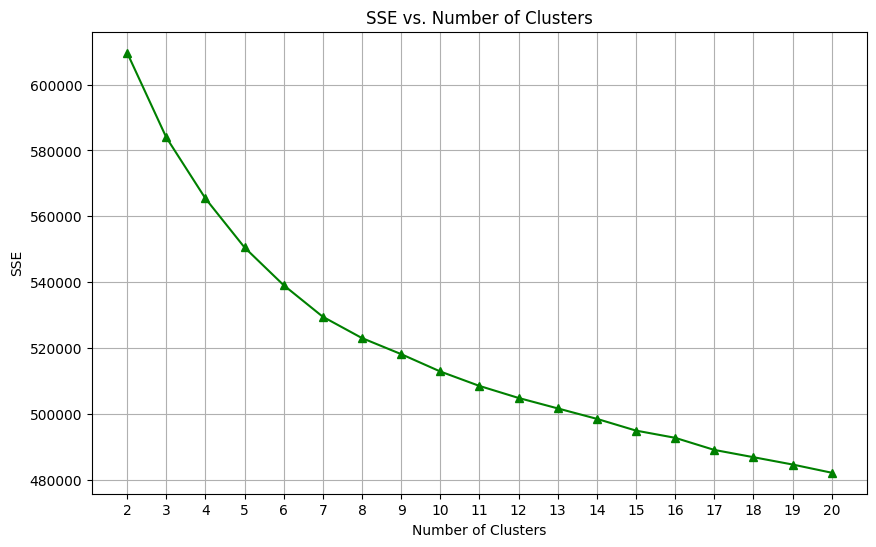

[]


In [ ]:
inertia = []
silhouette = []
SSE_dif = []

for n_clusters in range(2, 21):
    kmeans = K(n_clusters=n_clusters, random_state=0,n_init=10, init='k-means++', max_iter=300)
    km = kmeans.fit(X)

    inertia.append(km.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), inertia, marker='^', color='green' )
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(2, 21))
plt.grid(True)
plt.show()
print(SSE_dif)


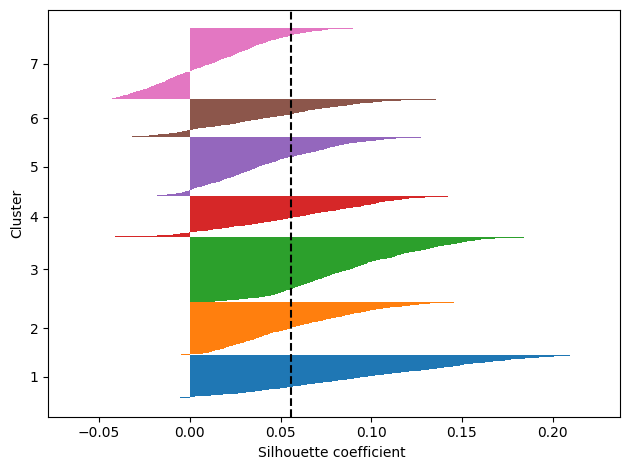

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
km = K(n_clusters=7, random_state=80, max_iter=1000, n_init=10)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,  y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none')
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="black", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient ')
plt.tight_layout()
plt.show()


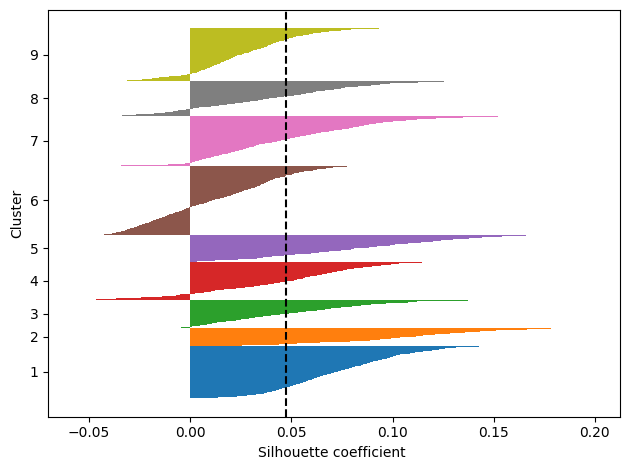

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm
km = K(n_clusters=9, random_state=80, max_iter=1000, n_init=10)
y_km = km.fit_predict(X)
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,  y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none')
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="black", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient ')
plt.tight_layout()
plt.show()

### Image Stuff


NameError: ignored

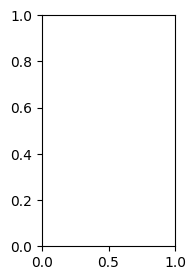

In [ ]:
# km = K(n_clusters=5, random_state=0, max_iter=1000, n_init=10)
# y_km = km.fit_predict(X)
# silhouette_values = silhouette_samples(X, y_km, metric='euclidean')

# core_samples = {}
# boundary_samples = []

# for i in range(n_clusters):
#     cluster_silhouette_values = silhouette_values[y_km == i]
#     sorted_indices = np.argsort(cluster_silhouette_values)
#     core_samples[i] = sorted_indices[-5:]
#     boundary_samples.append(sorted_indices[:2])

# def display_images(indices, title):
#     num_images = len(indices)
#     plt.figure(figsize=(2 * num_images, 3))  # Adjust figure size

#     for i, index in enumerate(indices):
#         ax = plt.subplot(1, num_images, i + 1)
#         ax.imshow(images[index].reshape(32, 32, 3), interpolation='none')
#         ax.set_xticks([])  # Remove x-axis ticks
#         ax.set_yticks([])  # Remove y-axis ticks
#         ax.set_title(f"Sample {index}", fontsize=10)  # Add a title to each subplot

#     plt.suptitle(title, fontsize=14, fontweight='bold')
#     plt.subplots_adjust(wspace=0.5)  # Adjust horizontal spacing between images
#     plt.show()


# for i in range(n_clusters):
#     display_images(core_samples[i], f'Cluster: {i+1} Core Samples ')
#     display_images(boundary_samples[i], f'Cluster: {i+1} Boundary Samples' )

### Classifiers

In [ ]:
random = 20
def train(x, y, model_name, params, fixed_params=None, SS=False, MM=False):
    if SS==True:
        x=standardScaler.fit_transform(x)
    if MM==True:
        x=MMS.fit_transform(x)

    model_class = globals()[model_name]
    for key, values in params.items():
        validationScores = []
        trainScores = []
        for value in values:
            model=model_class(**fixed_params)
            model.set_params(**{key: value})
            cv_results = cross_validate(model, x, y, scoring='accuracy', cv=4, return_train_score=True)

            trainScores.append(np.mean(cv_results["train_score"]))
            validationScores.append(np.mean(cv_results["test_score"]))
        x_axis = values
        plt.plot(x_axis, trainScores, marker="^", label="Train")
        plt.plot(x_axis, validationScores, marker="o", label="Validation")
        plt.grid()
        plt.xlabel(key)
        plt.ylabel("Average Accuracy")
        if SS==True:
            plt.title("With Standard Scaler")
        if MM==True:
            plt.title("With MinMax Scaler")
        plt.legend()
        plt.show()

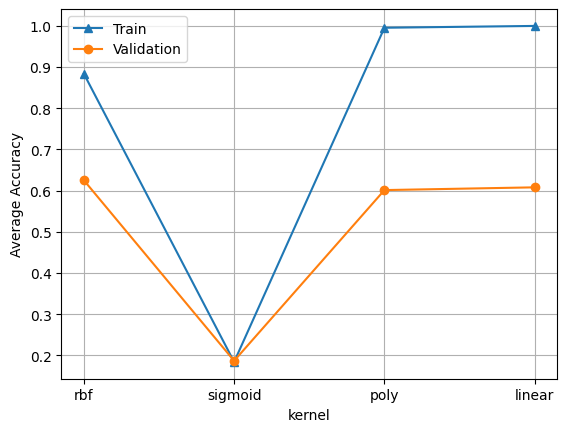

In [ ]:
params={'kernel':['rbf', 'sigmoid', 'poly', 'linear']}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params={'random_state':random})

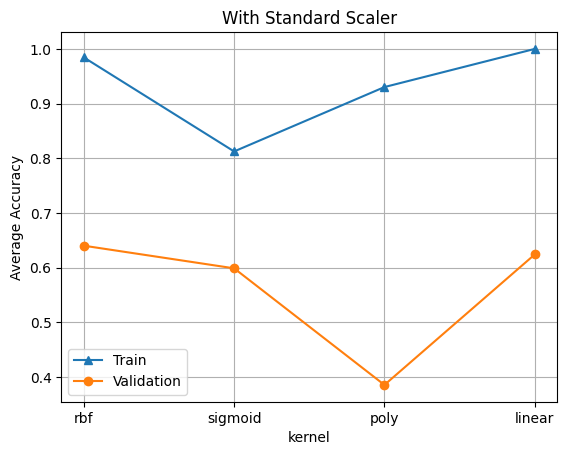

In [ ]:
params={'kernel':['rbf', 'sigmoid', 'poly', 'linear']}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params={'random_state':random}, SS=True)

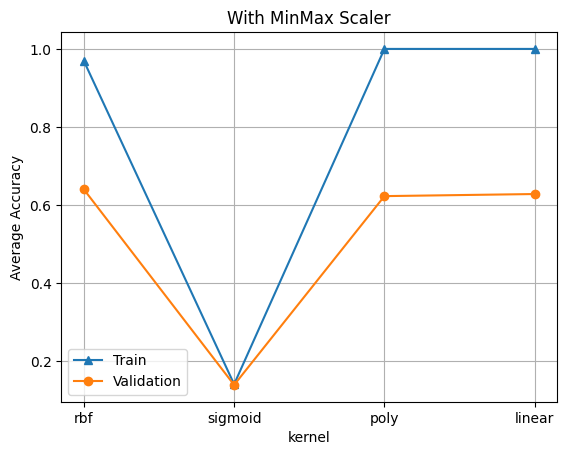

In [ ]:
params={'kernel':['rbf', 'sigmoid', 'poly', 'linear']}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params={'random_state':random}, SS=False, MM=True)

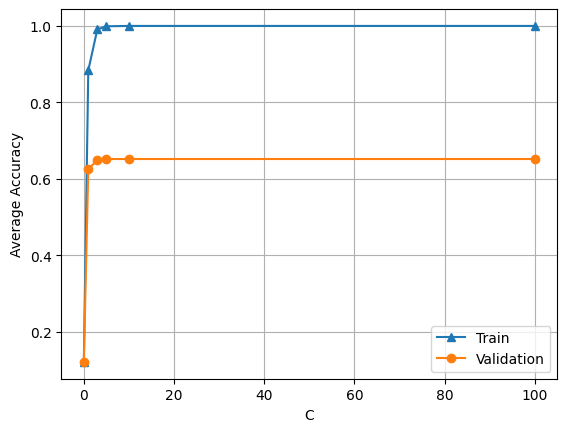

In [ ]:
params={'C':[0.01, 1, 3, 5, 10, 100]}
fixed_params={'kernel': 'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params)

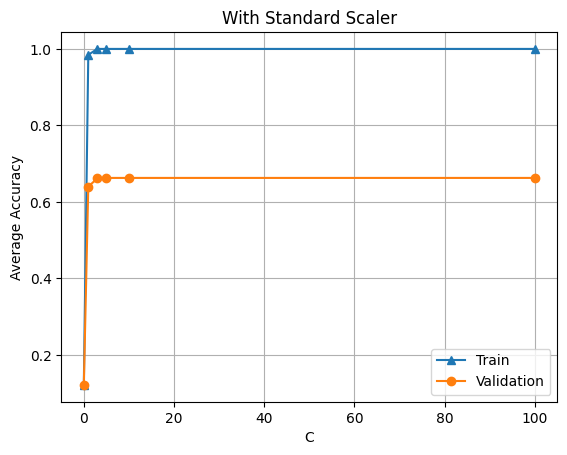

In [ ]:
params={'C':[0.01, 1, 3, 5, 10, 100]}
fixed_params={'kernel': 'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params, SS=True)

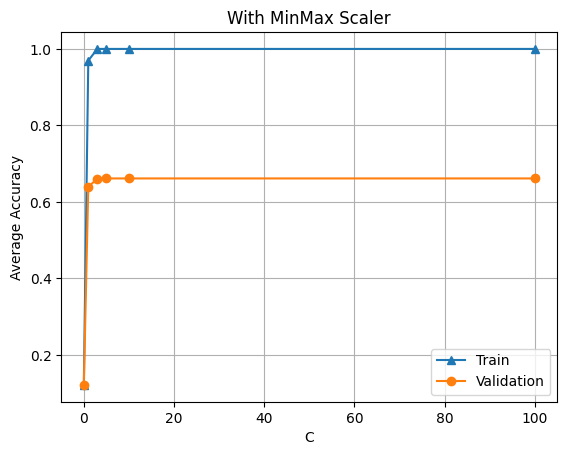

In [ ]:
params={'C':[0.01, 1, 3, 5, 10, 100]}
fixed_params={'kernel': 'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params, SS=False, MM=True)

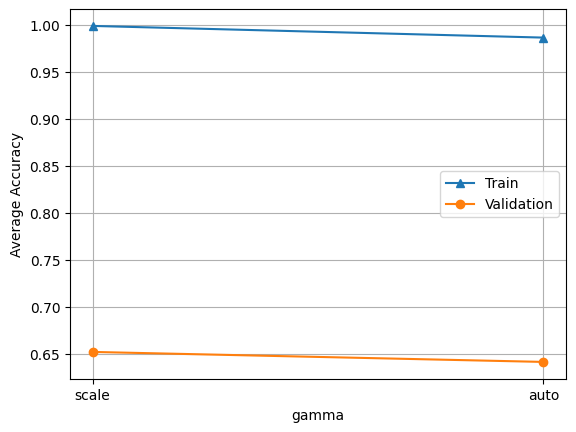

In [ ]:
params={'gamma':['scale', 'auto']}
fixed_params={'kernel': 'rbf', 'C':5, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params)

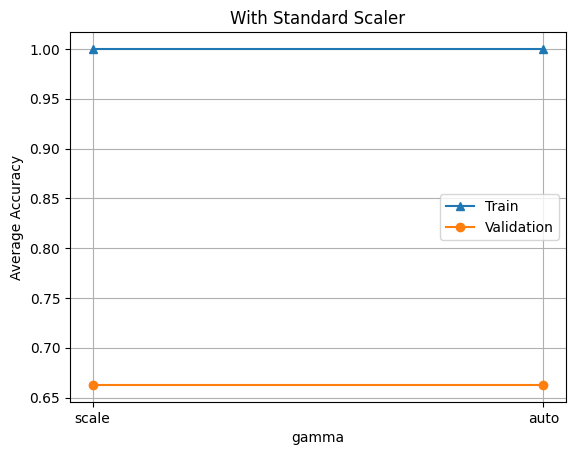

In [ ]:
params={'gamma':['scale', 'auto']}
fixed_params={'kernel': 'rbf', 'C':5, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params, SS=True)

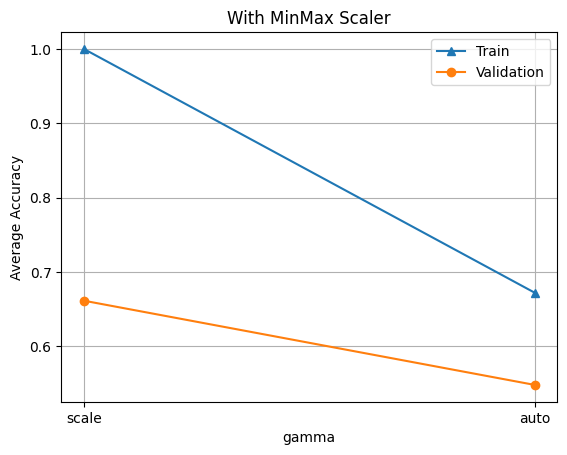

In [ ]:
params={'gamma':['scale', 'auto']}
fixed_params={'kernel': 'rbf', 'C':5, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params, SS=False, MM=True)

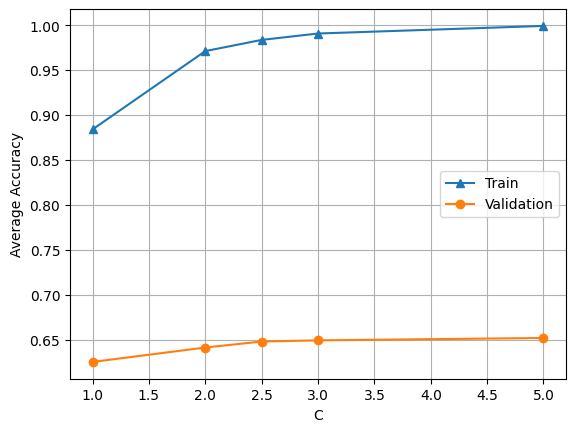

In [ ]:

params={'C':[1, 2, 2.5, 3, 5]}
fixed_params={'kernel':'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params)

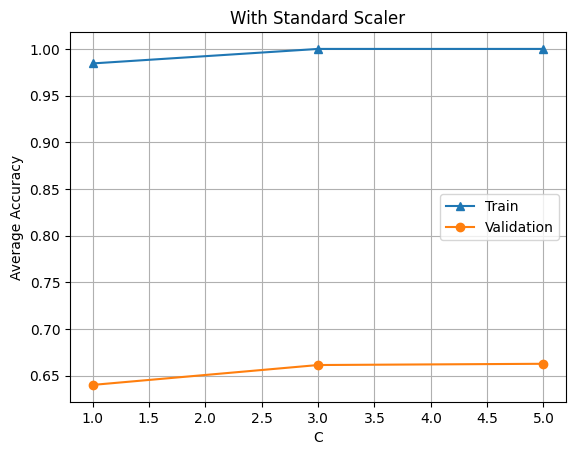

In [ ]:
params={'C':[1, 3, 5]}
fixed_params={'kernel':'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params, True)

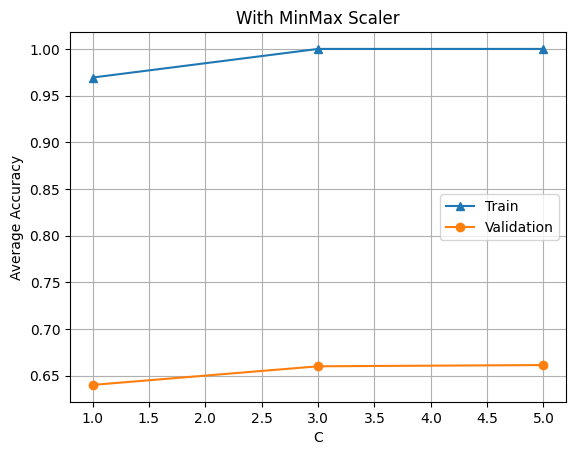

In [ ]:
params={'C':[1, 3, 5]}
fixed_params={'kernel':'rbf', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'SVC', params, fixed_params, False, True)

In [ ]:
finalSVC = SVC(kernel='rbf', C=5, probability=True)
X_Train_SS = standardScaler.fit_transform(X_train)
finalSVC.fit(X_Train_SS, y_train)
X_test_SS = standardScaler.fit_transform(X_test)
svc_preds = finalSVC.predict(X_test_SS)
SVCScore = finalSVC.score(X_test_SS, y_test)
print(SVCScore)

0.8136


### **MLP Class**

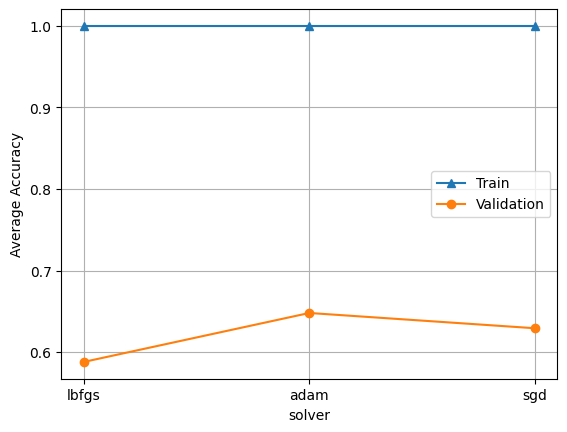

In [ ]:
params={'solver':['lbfgs', 'adam', 'sgd']}
fixed_params={'max_iter':10000, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params)

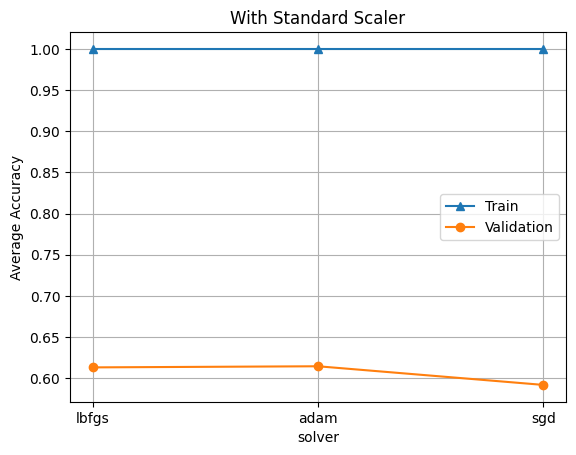

In [ ]:
params={'solver':['lbfgs', 'adam', 'sgd']}
fixed_params={'max_iter':10000, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params, SS=True)

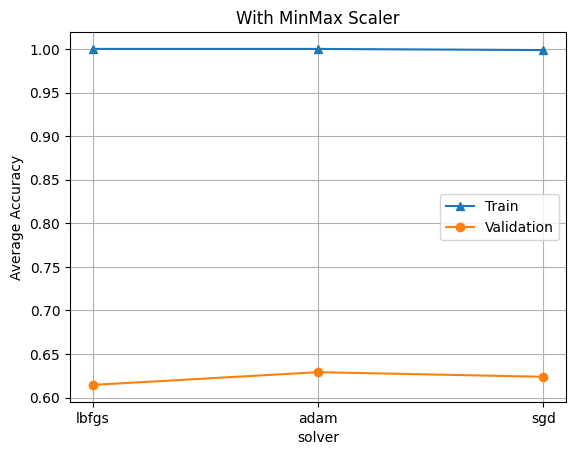

In [ ]:
params={'solver':['lbfgs', 'adam', 'sgd']}
fixed_params={'max_iter':10000, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params, SS=False, MM=True)

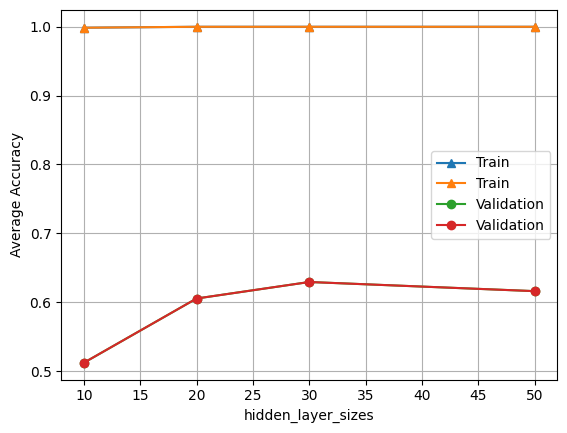

In [ ]:
params={'hidden_layer_sizes':[[10, 10],[20, 20],[30, 30], [50, 50]]}
fixed_params={'max_iter': 10000, 'solver':'adam', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params)

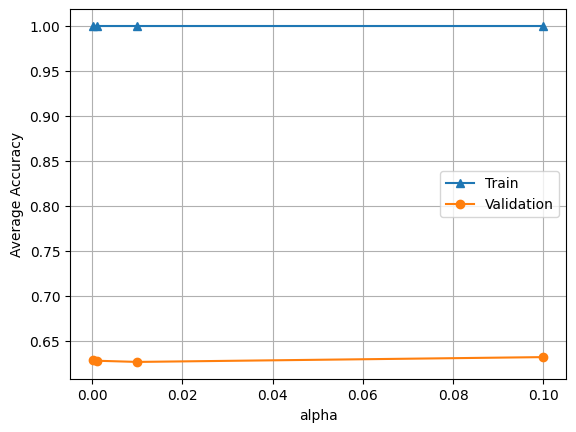

In [ ]:
params={'alpha': [ 0.0001, 0.001, 0.01, 0.1]}
fixed_params={'max_iter': 10000, 'solver':'adam', 'hidden_layer_sizes':[30, 30], 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params)

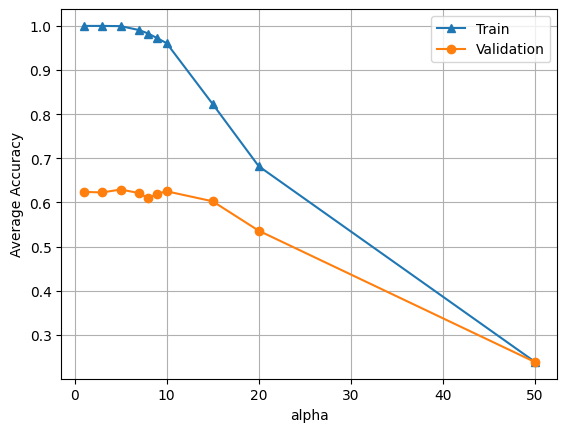

In [ ]:
params={'alpha': [1, 3, 5,7,8,9, 10, 15, 20, 50]}
fixed_params={'max_iter': 10000, 'solver':'adam', 'hidden_layer_sizes':[30, 30], 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params)

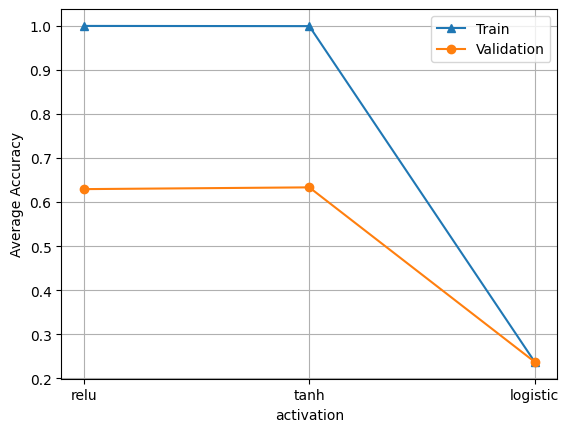

In [ ]:
params={'activation':['relu', 'tanh', 'logistic']}
fixed_params={'max_iter': 10000, 'solver':'adam', 'hidden_layer_sizes':[30, 30], 'alpha':5, 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params)

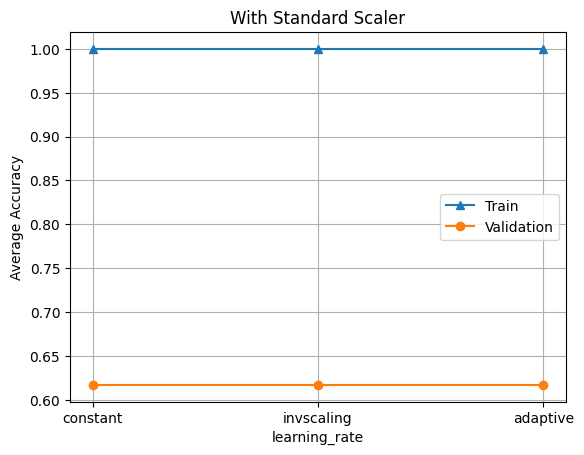

In [ ]:
params={'learning_rate':['constant', 'invscaling', 'adaptive']}
fixed_params={'max_iter': 10000, 'solver':'adam', 'hidden_layer_sizes':[30, 30], 'alpha':5, 'activation':'relu',
              'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params, True)

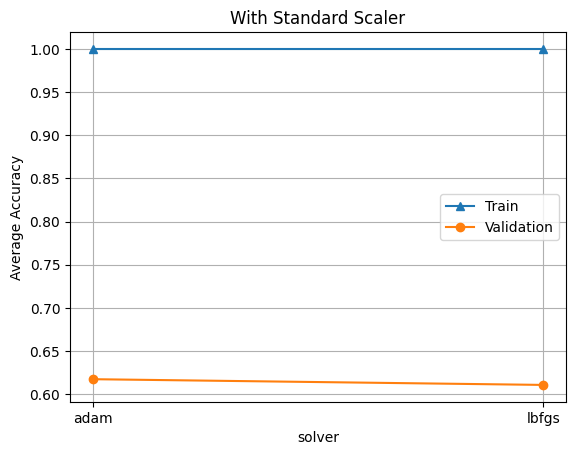

In [ ]:
params={'solver':['adam', 'lbfgs']}
fixed_params={'max_iter': 10000, 'hidden_layer_sizes':[30, 30], 'alpha':5, 'activation':'relu', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params, True)

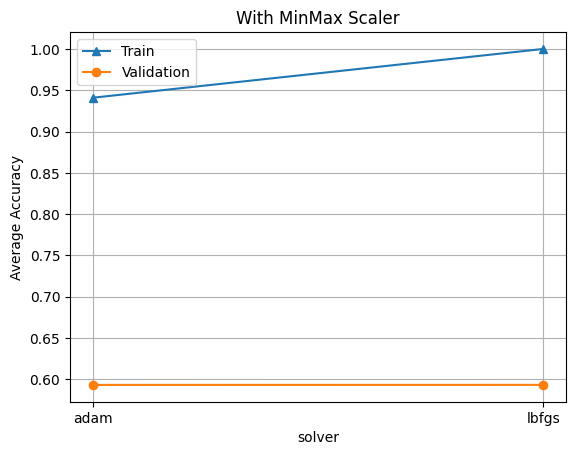

In [ ]:
params={'solver':['adam', 'lbfgs']}
fixed_params={'max_iter': 10000, 'hidden_layer_sizes':[30, 30], 'alpha':5, 'activation':'relu', 'random_state':random}
train(FifthXTrain, FifthYTrain, 'MLPClassifier', params, fixed_params, False, True)

In [ ]:
finalMLP = MLPClassifier(max_iter=10000, solver='adam', hidden_layer_sizes=[30, 30], alpha=10, activation='relu',random_state=random )
finalMLP.fit(X_train, y_train)
mlp_preds = finalMLP.predict(X_test)
MLPScore = finalMLP.score(X_test, y_test)
print(MLPScore)

0.6904


### **MLP Pipe**

In [ ]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import MLP

steps = [
    ('scaler', MMS),
    ('pca', PCA(n_components=2)),
    ('mlp', MLPClassifier())
]
# 'hidden_layer_sizes':[[10, 10],[20, 20],[30, 30], [50, 50]]
param_grid = {'mlp__hidden_layer_sizes': [[100, 20], [100, 20, 10], [100]],
              'mlp__alpha': [3, 7, 15],
              'scaler': [None, MMS, standardScaler],
              'pca__n_components': [160, 360]}

pipeline = Pipeline(steps)


grid_searchMLP = GridSearchCV(pipeline, param_grid, cv=4, verbose=3)
grid_searchMLP.fit(X_train, y_train)


Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=None;, score=0.765 total time=   5.4s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=None;, score=0.742 total time=  12.3s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=None;, score=0.746 total time=   7.5s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=None;, score=0.749 total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=MinMaxScaler();, score=0.650 total time=   5.3s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=MinMaxScaler();, score=0.639 total time=   9.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=MinMaxScaler();, score=0.648 total time=   7.3s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=MinMaxScaler();, score=0.655 total time=   8.2s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.769 total time=   4.7s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.777 total time=   8.2s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.757 total time=   6.3s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.762 total time=   8.0s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.775 total time=   5.7s
[CV 2/4] END mlp__alph

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=MinMaxScaler();, score=0.671 total time=   8.1s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=MinMaxScaler();, score=0.674 total time=   6.9s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=MinMaxScaler();, score=0.693 total time=   5.2s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=MinMaxScaler();, score=0.674 total time=   8.7s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.779 total time=   4.8s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.788 total time=   5.9s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.757 total time=   5.3s
[CV 4/4] END m

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=None;, score=0.729 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.490 total time=   5.4s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.569 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.613 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.601 total time=   4.7s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.764 total time=   5.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.769 total time=   7.4s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.745 total time=   4.0s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.725 total time=   3.5s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.757 total time=   8.3s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.748 total time=   6.6s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.742 total time=   8.7s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.736 total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.502 total time=   9.7s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.585 total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.512 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.607 total time=   8.7s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.769 total time=   5.8s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.764 total time=   4.5s
[CV 3/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.739 total time=   8.0s
[CV 4/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.761 total time=   6.9s
[CV 1/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.745 total time=   2.6s
[CV 2/4] END mlp__alpha=3, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.751 total time=   4.9s
[CV 3/4] END mlp__al

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=MinMaxScaler();, score=0.257 total time=   4.4s
[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.742 total time=   4.9s
[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.724 total time=   3.3s
[CV 3/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.705 total time=   2.8s
[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.716 total time=   2.9s
[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.691 total time=   8.4s
[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.681 total time=   4.8s
[CV 3/4] END mlp__alpha=7, mlp__

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.262 total time=   5.5s
[CV 3/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.261 total time=   3.0s
[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.247 total time=   4.4s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.676 total time=   6.9s
[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.657 total time=   2.7s
[CV 3/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.685 total time=   3.9s
[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.671 total time=   6.7s
[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.583 total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.610 total time=  10.0s
[CV 3/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.604 total time=   8.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.630 total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.256 total time=   8.8s
[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.102 total time=   5.2s
[CV 3/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.274 total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.261 total time=   9.6s
[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.716 total time=   5.5s
[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.705 total time=   7.6s
[CV 3/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.691 total time=   4.3s
[CV 4/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.714 total time=   5.1s
[CV 1/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.710 total time=   4.9s
[CV 2/4] END mlp__alpha=7, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.716 total time=   2.3s
[CV 3/4] END mlp__al

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.564 total time=   7.1s
[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=160, scaler=StandardScaler();, score=0.615 total time=   2.8s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.389 total time=   7.3s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.375 total time=   7.2s
[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.386 total time=   4.9s
[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=None;, score=0.390 total time=   7.6s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=MinMaxScaler();, score=0.102 total time=   4.3s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_siz

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.584 total time=   7.7s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.607 total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.604 total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20], pca__n_components=360, scaler=StandardScaler();, score=0.599 total time=   8.4s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=None;, score=0.241 total time=   4.0s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=None;, score=0.256 total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=None;, score=0.232 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=None;, score=0.241 total time=   4.8s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.102 total time=   8.2s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.102 total time=   3.8s
[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.101 total time=   3.2s
[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=MinMaxScaler();, score=0.104 total time=   4.7s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.401 total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.424 total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.442 total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=160, scaler=StandardScaler();, score=0.415 total time=   4.7s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.248 total time=   9.0s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.247 total time=   7.3s
[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.253 total time=   9.3s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=None;, score=0.259 total time=   7.2s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.102 total time=   7.1s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.102 total time=   5.6s
[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.099 total time=   4.9s
[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=MinMaxScaler();, score=0.104 total time=   7.6s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.360 total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.408 total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.441 total time=   7.2s
[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100, 20, 10], pca__n_components=360, scaler=StandardScaler();, score=0.424 total time=   9.1s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.595 total time=   2.6s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.592 total time=   2.6s
[CV 3/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.606 total time=   2.4s
[CV 4/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=None;, score=0.600 total time=   4.0s
[CV 1/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100], pca__n_components=160, scaler=MinMaxScaler();, score=0.235 total time=   2.8s
[CV 2/4] END mlp__alpha=15, mlp__hidden_layer_sizes=[100], pc

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__alpha': [3, 7, 15],
                         'mlp__hidden_layer_sizes': [[100, 20], [100, 20, 10],
                                                     [100]],
                         'pca__n_components': [160, 360],
                         'scaler': [None, MinMaxScaler(), StandardScaler()]},
             verbose=3)

In [ ]:
print("Test set score: {:.2f}".format(grid_searchMLP.score(X_test, y_test)))
print("Best parameters: {}".format(grid_searchMLP.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_searchMLP.best_score_))

Test set score: 0.82
Best parameters: {'mlp__alpha': 3, 'mlp__hidden_layer_sizes': [100], 'pca__n_components': 360, 'scaler': StandardScaler()}
Best cross-validation score: 0.78


In [33]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, roc_curve
# from sklearn.ensemble import MLP

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, multi_class='ovo', needs_proba=True)
}

steps = [
    ('scaler', MMS),
    ('pca', PCA(n_components=2)),
    ('mlp', MLPClassifier())
]
# 'hidden_layer_sizes':[[10, 10],[20, 20],[30, 30], [50, 50]]
param_grid = {'mlp__hidden_layer_sizes': [[ 100], [100, 20]],
              'mlp__alpha': [3],
              'mlp__activation':['relu'],
              'mlp__solver':['adam'],
              'mlp__max_iter': [ 500,1000],
              'scaler': [standardScaler],
              'pca__n_components': [160, 360]}

pipeline = Pipeline(steps)


grid_searchMLP = GridSearchCV(pipeline, param_grid, cv=4, verbose=3, scoring=scoring, refit='accuracy')
grid_searchMLP.fit(X_train, y_train)

Fitting 4 folds for each of 8 candidates, totalling 32 fits
[CV 1/4] END mlp__activation=relu, mlp__alpha=3, mlp__hidden_layer_sizes=[100], mlp__max_iter=500, mlp__solver=adam, pca__n_components=160, scaler=StandardScaler(); accuracy: (test=0.760) f1_score: (test=0.757) roc_auc: (test=0.969) total time=   6.2s
[CV 2/4] END mlp__activation=relu, mlp__alpha=3, mlp__hidden_layer_sizes=[100], mlp__max_iter=500, mlp__solver=adam, pca__n_components=160, scaler=StandardScaler(); accuracy: (test=0.773) f1_score: (test=0.771) roc_auc: (test=0.966) total time=   2.4s
[CV 3/4] END mlp__activation=relu, mlp__alpha=3, mlp__hidden_layer_sizes=[100], mlp__max_iter=500, mlp__solver=adam, pca__n_components=160, scaler=StandardScaler(); accuracy: (test=0.756) f1_score: (test=0.752) roc_auc: (test=0.965) total time=   2.9s
[CV 4/4] END mlp__activation=relu, mlp__alpha=3, mlp__hidden_layer_sizes=[100], mlp__max_iter=500, mlp__solver=adam, pca__n_components=160, scaler=StandardScaler(); accuracy: (test=0.7

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('mlp', MLPClassifier())]),
             param_grid={'mlp__activation': ['relu'], 'mlp__alpha': [3],
                         'mlp__hidden_layer_sizes': [[100], [100, 20]],
                         'mlp__max_iter': [500, 1000], 'mlp__solver': ['adam'],
                         'pca__n_components': [160, 360],
                         'scaler': [StandardScaler()]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1_score': make_scorer(f1_score, average=macro),
                      'roc_auc': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovo)},
             verbose=3)

In [34]:
print("Test set score: {:.2f}".format(grid_searchMLP.score(X_test, y_test)))
print("Best parameters: {}".format(grid_searchMLP.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_searchMLP.best_score_))

Test set score: 0.81
Best parameters: {'mlp__activation': 'relu', 'mlp__alpha': 3, 'mlp__hidden_layer_sizes': [100], 'mlp__max_iter': 1000, 'mlp__solver': 'adam', 'pca__n_components': 360, 'scaler': StandardScaler()}
Best cross-validation score: 0.78


In [ ]:
results = pd.DataFrame(grid_searchMLP.cv_results_)
df_sorted = results.sort_values(by='rank_test_score', ascending=True)
# print(results)
# Now select the top 5 rows
top_5_rows = df_sorted.head(5)
display(top_5_rows)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp__activation,param_mlp__alpha,param_mlp__hidden_layer_sizes,param_mlp__max_iter,param_mlp__solver,param_pca__n_components,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,8.067087,2.318703,0.024535,0.007137,relu,3,100,500,adam,360,StandardScaler(),"{'mlp__activation': 'relu', 'mlp__alpha': 3, '...",0.778252,0.787846,0.757737,0.780149,0.775996,0.011137,1
11,6.808706,2.077971,0.020052,0.001236,relu,3,100,1000,adam,360,StandardScaler(),"{'mlp__activation': 'relu', 'mlp__alpha': 3, '...",0.778252,0.778252,0.755603,0.774813,0.771730,0.009416,2
8,5.501853,1.617063,0.015920,0.004313,relu,3,100,1000,adam,160,StandardScaler(),"{'mlp__activation': 'relu', 'mlp__alpha': 3, '...",0.772921,0.766525,0.740662,0.779082,0.764797,0.014625,3
2,5.784582,1.435938,0.015828,0.004947,relu,3,100,500,adam,160,StandardScaler(),"{'mlp__activation': 'relu', 'mlp__alpha': 3, '...",0.766525,0.776119,0.743863,0.764141,0.762662,0.011743,4
17,7.082108,1.434787,0.040964,0.016055,tanh,3,100,500,adam,360,StandardScaler(),"{'mlp__activation': 'tanh', 'mlp__alpha': 3, '...",0.765458,0.765458,0.745998,0.759872,0.759197,0.007954,5


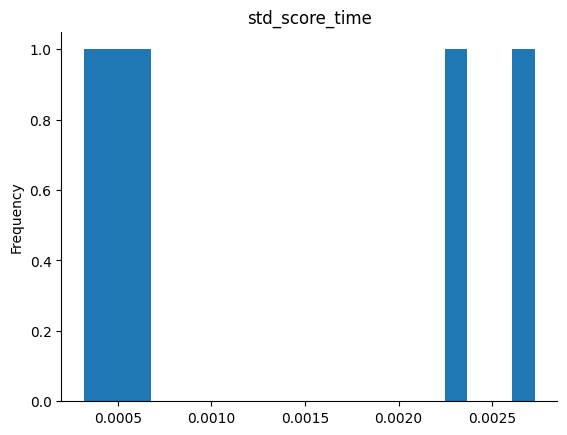

In [ ]:
from matplotlib import pyplot as plt
top_5_rows['std_score_time'].plot(kind='hist', bins=20, title='std_score_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

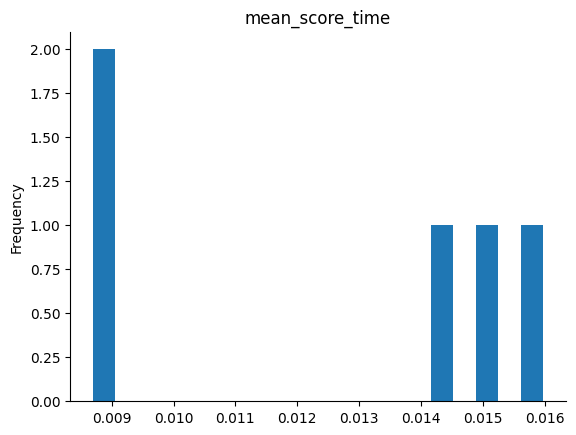

In [ ]:
from matplotlib import pyplot as plt
top_5_rows['mean_score_time'].plot(kind='hist', bins=20, title='mean_score_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

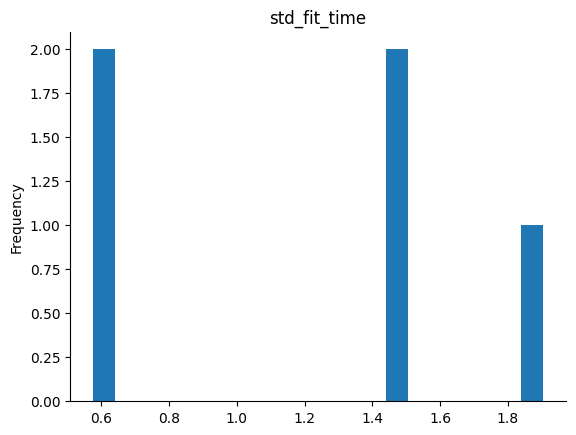

In [ ]:
from matplotlib import pyplot as plt
top_5_rows['std_fit_time'].plot(kind='hist', bins=20, title='std_fit_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

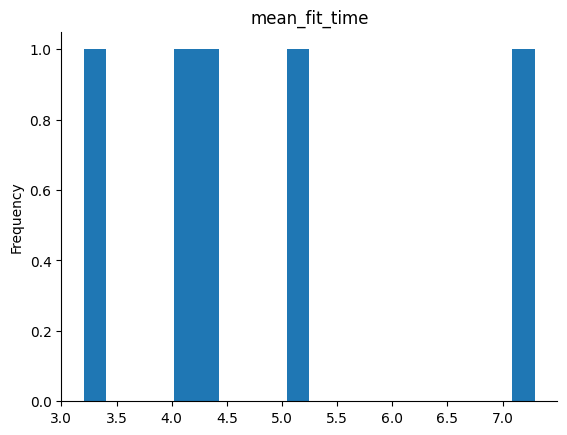

In [ ]:
from matplotlib import pyplot as plt
top_5_rows['mean_fit_time'].plot(kind='hist', bins=20, title='mean_fit_time')
plt.gca().spines[['top', 'right',]].set_visible(False)

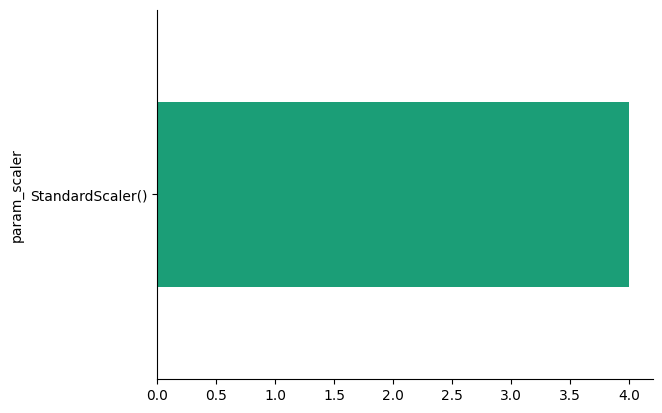

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
top_5_rows.groupby('param_scaler').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

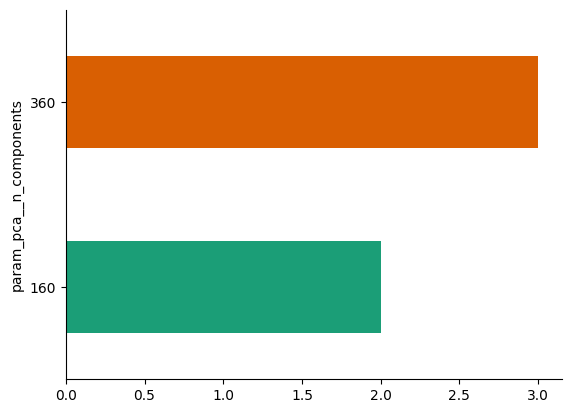

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
top_5_rows.groupby('param_pca__n_components').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

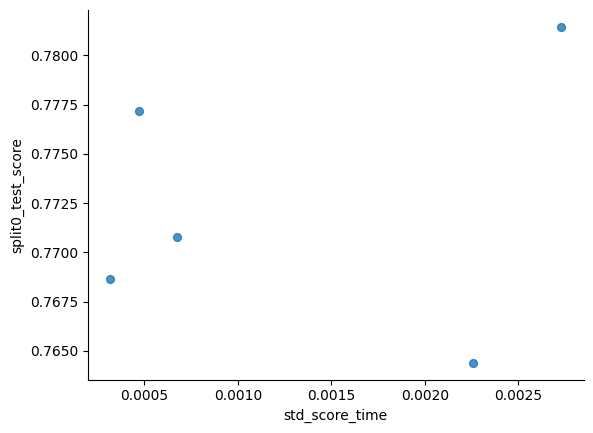

In [ ]:
from matplotlib import pyplot as plt
top_5_rows.plot(kind='scatter', x='std_score_time', y='split0_test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

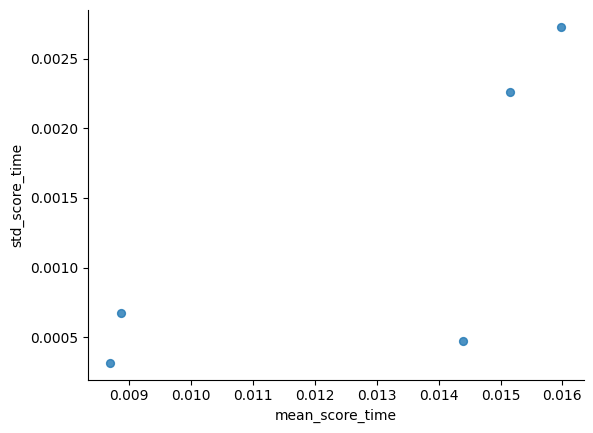

In [ ]:
from matplotlib import pyplot as plt
top_5_rows.plot(kind='scatter', x='mean_score_time', y='std_score_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

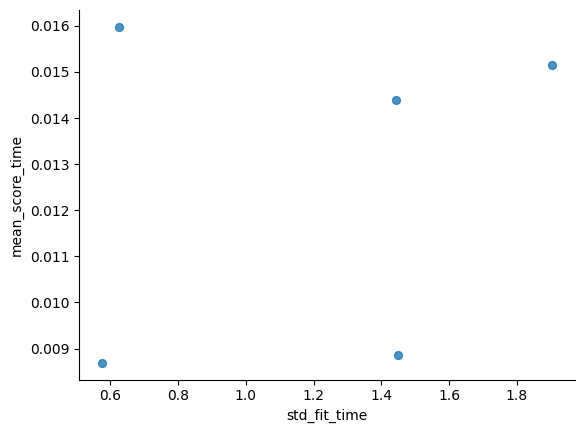

In [ ]:
from matplotlib import pyplot as plt
top_5_rows.plot(kind='scatter', x='std_fit_time', y='mean_score_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

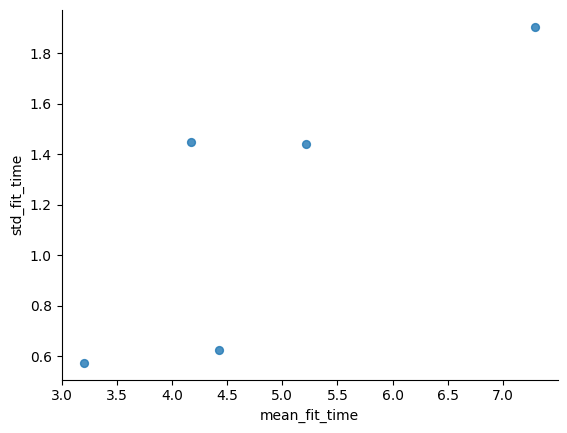

In [ ]:
from matplotlib import pyplot as plt
top_5_rows.plot(kind='scatter', x='mean_fit_time', y='std_fit_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

### **Grid Search**

### GBT

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'max_depth': [1, 3, 5, 7],
              'n_estimators': [5, 10, 15, 20, 30]}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=4, verbose=3)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[CV 1/4] END .......max_depth=1, n_estimators=5;, score=0.374 total time=  11.8s
[CV 2/4] END .......max_depth=1, n_estimators=5;, score=0.390 total time=  10.8s
[CV 3/4] END .......max_depth=1, n_estimators=5;, score=0.372 total time=  11.0s
[CV 4/4] END .......max_depth=1, n_estimators=5;, score=0.370 total time=  12.4s
[CV 1/4] END ......max_depth=1, n_estimators=10;, score=0.414 total time=  22.1s
[CV 2/4] END ......max_depth=1, n_estimators=10;, score=0.432 total time=  22.1s
[CV 3/4] END ......max_depth=1, n_estimators=10;, score=0.416 total time=  24.7s
[CV 4/4] END ......max_depth=1, n_estimators=10;, score=0.412 total time=  21.7s
[CV 1/4] END ......max_depth=1, n_estimators=15;, score=0.456 total time=  33.8s
[CV 2/4] END ......max_depth=1, n_estimators=15;, score=0.452 total time=  33.4s
[CV 3/4] END ......max_depth=1, n_estimators=15;, score=0.442 total time=  33.6s
[CV 4/4] END ......max_depth=1, n_estimators=15;

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 3, 'n_estimators': 30}
Best cross-validation score: 0.61


In [ ]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,11.491747,0.629529,0.004774,0.000472,1,5,"{'max_depth': 1, 'n_estimators': 5}",0.374200,0.390192,0.372465,0.370331,0.376797,0.007854,20
1,22.630333,1.188490,0.005221,0.000738,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.413646,0.431770,0.416222,0.411953,0.418398,0.007869,19
2,33.574067,0.176420,0.006261,0.001205,1,15,"{'max_depth': 1, 'n_estimators': 15}",0.456290,0.452026,0.441836,0.445037,0.448797,0.005683,18
3,44.344852,0.332871,0.007395,0.001871,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.475480,0.484009,0.482391,0.458911,0.475198,0.009933,16
4,66.716753,0.289878,0.008879,0.002345,1,30,"{'max_depth': 1, 'n_estimators': 30}",0.528785,0.512793,0.519744,0.493063,0.513596,0.013141,12
5,31.530722,0.444981,0.006377,0.001673,3,5,"{'max_depth': 3, 'n_estimators': 5}",0.498934,0.505330,0.469584,0.466382,0.485058,0.017261,14
6,62.746377,0.645492,0.007235,0.001210,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.540512,0.540512,0.519744,0.522946,0.530928,0.009650,11
7,94.902724,1.033034,0.010094,0.002368,3,15,"{'max_depth': 3, 'n_estimators': 15}",0.573561,0.583156,0.545358,0.544290,0.561591,0.017111,8
8,128.977749,1.204814,0.009903,0.002117,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.589552,0.601279,0.577375,0.561366,0.582393,0.014792,4
9,191.015819,0.818808,0.010976,0.000358,3,30,"{'max_depth': 3, 'n_estimators': 30}",0.611940,0.615139,0.600854,0.596585,0.606129,0.007646,1


### **GBT with Pipe**

In [ ]:

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

steps = [
    ('scaler', MMS),
    ('pca', PCA(n_components=2)),
    ('GBT', GradientBoostingClassifier())
]

param_grid = {'GBT__max_depth': [3, 7],
              'GBT__n_estimators': [100],
              'scaler': [None],
              'pca__n_components': [160]}

pipeline = Pipeline(steps)


grid_searchGBT = GridSearchCV(pipeline, param_grid, cv=4, verbose=3)
grid_searchGBT.fit(X_train, y_train)



Fitting 4 folds for each of 2 candidates, totalling 8 fits
[CV 1/4] END GBT__max_depth=3, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.667 total time= 2.4min
[CV 2/4] END GBT__max_depth=3, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.614 total time= 2.3min
[CV 3/4] END GBT__max_depth=3, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.618 total time= 2.3min
[CV 4/4] END GBT__max_depth=3, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.613 total time= 2.3min
[CV 1/4] END GBT__max_depth=7, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.630 total time= 4.9min
[CV 2/4] END GBT__max_depth=7, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.601 total time= 4.9min
[CV 3/4] END GBT__max_depth=7, GBT__n_estimators=100, pca__n_components=160, scaler=None;, score=0.602 total time= 4.8min
[CV 4/4] END GBT__max_depth=7, GBT__n_estimators=100, pca__n_components=160, scaler=Non

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('GBT', GradientBoostingClassifier())]),
             param_grid={'GBT__max_depth': [3, 7], 'GBT__n_estimators': [100],
                         'pca__n_components': [160], 'scaler': [None]},
             verbose=3)

In [ ]:
print("Test set score: {:.2f}".format(grid_searchGBT.score(X_test, y_test)))
print("Best parameters: {}".format(grid_searchGBT.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_searchGBT.best_score_))

Test set score: 0.66
Best parameters: {'GBT__max_depth': 3, 'GBT__n_estimators': 100, 'pca__n_components': 160, 'scaler': None}
Best cross-validation score: 0.63


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[ 10, 11, 12, 13],
              'metric': ['euclidean', 'manhattan', 'cosine', 'minkowski']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=4)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

KeyboardInterrupt: ignored

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results)

In [ ]:
!pip install mglearn
import mglearn

In [ ]:
print(results.mean_test_score)
scores = np.array(results.mean_test_score).reshape(len(param_grid['n_neighbors']), len(param_grid['metric']))
mglearn.tools.heatmap(scores, xlabel= 'n_neighbors',
  xticklabels=param_grid['n_neighbors'],
  ylabel='metric', yticklabels=param_grid['metric'],
  cmap="viridis")

### KNN with Pipe

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV

steps = [
    ('scaler', MMS),
    ('pca', PCA(n_components=2)),
    ('knn', KNN())
]
pipeline = Pipeline(steps)
param_grid = {'scaler': [None, StandardScaler(), MMS],
              'knn__n_neighbors':[ 13, 14, 15, 20],
              'knn__metric': ['euclidean', 'manhattan', 'cosine', 'minkowski'],
              'pca__n_components': [160, 360]}


grid_searchKNN = GridSearchCV(pipeline, param_grid, cv=4)
grid_searchKNN.fit(X_train, y_train)

pipeline.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_searchKNN.score(X_test, y_test)))
print("Best parameters: {}".format(grid_searchKNN.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_searchKNN.best_score_))

Test set score: 0.69
Best parameters: {'knn__metric': 'cosine', 'knn__n_neighbors': 14, 'pca__n_components': 360, 'scaler': StandardScaler()}
Best cross-validation score: 0.71


### **Boosting**

In [4]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Create individual classifiers
knn = KNeighborsClassifier(metric='cosine', n_neighbors=14, )
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=[100, 20], max_iter=500, solver='adam')
svm = SVC(probability=True)  # Ensure probability is True for soft voting

# Best parameters: {'mlp__activation': 'relu', 'mlp__alpha': 3, 'mlp__hidden_layer_sizes': 100, 'mlp__max_iter': 500, 'mlp__solver': 'adam', 'pca__n_components': 360, 'scaler': StandardScaler()}
# Create the voting classifier
# Replace 'hard' with 'soft' if you prefer soft voting
voting_clf = VotingClassifier(estimators=[('knn', knn), ('mlp', mlp), ('svm', svm)], voting='hard')

# Train the ensemble classifier
voting_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = voting_clf.predict(X_test)

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create individual classifiers with hyperparameters
knn = KNeighborsClassifier(n_neighbors=14, metric='cosine')  # Example hyperparameter for KNN
mlp = MLPClassifier(hidden_layer_sizes=([100, 20]), alpha=3, max_iter=500, solver='adam', activation='relu')  # Example hyperparameters for MLP
svm = SVC(kernel='rbf', C=5, probability=True)  # Example hyperparameters for SVM

# Create pipelines for each classifier
pipeline_knn = Pipeline([('pca', PCA(n_components=360)), ('knn', knn)])
pipeline_mlp = Pipeline([('pca', PCA(n_components=360)), ('mlp', mlp)])
pipeline_svm = Pipeline([('pca', PCA(n_components=360)), ('svm', svm)])

# Create the voting classifier with pipelines
voting_clf = VotingClassifier(estimators=[('knn', pipeline_knn), ('mlp', pipeline_mlp), ('svm', pipeline_svm)], voting='soft', verbose=3)

# Train the ensemble classifier
voting_clf.fit(X_train_scaled, y_train)

# Evaluate the model
predictions = voting_clf.score(X_test_scaled, y_test)
print("Test set score: {:.2f}".format(predictions))

[Voting] ...................... (1 of 3) Processing knn, total=   1.5s
[Voting] ...................... (2 of 3) Processing mlp, total=  18.1s
[Voting] ...................... (3 of 3) Processing svm, total=  23.8s
Test set score: 0.82


In [7]:

from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create individual classifiers
knn = KNeighborsClassifier(n_neighbors=14, metric='cosine')  # Example hyperparameter for KNN
mlp = MLPClassifier(hidden_layer_sizes=([100]), alpha=3, max_iter=200, solver='adam', activation='relu')  # Example hyperparameters for MLP
svm = SVC(kernel='rbf', C=5, probability=True)  # Example hyperparameters for SVM

pipeline_knn = Pipeline([('pca', PCA(n_components=360)), ('knn', knn)])
pipeline_mlp = Pipeline([('pca', PCA(n_components=360)), ('mlp', mlp)])
pipeline_svm = Pipeline([('pca', PCA(n_components=360)), ('svm', svm)])

# Create bagging ensembles for each classifier
bagging_knn = BaggingClassifier(estimator=pipeline_knn, n_estimators=250, random_state=0, verbose=3, max_samples=1.0, bootstrap_features=False)
bagging_mlp = BaggingClassifier(estimator=pipeline_mlp, n_estimators=250, random_state=0, verbose=3, max_samples=1.0, bootstrap_features=False)
bagging_svm = BaggingClassifier(estimator=pipeline_svm, n_estimators=250, random_state=0, verbose=3, max_samples=1.0, bootstrap_features=False)

# Train each bagging ensemble on the training data
# Assuming X_train and y_train are your training data and labels
bagging_knn.fit(X_train, y_train)
bagging_mlp.fit(X_train, y_train)
bagging_svm.fit(X_train, y_train)

Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 4 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 5 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 6 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 7 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 16 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 17 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 18 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 19 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 20 of 250 for this parallel run (total 250)...
Building estimator 21 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 22 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 23 of 250 for this parallel run (total 250)...
Building estimator 24 of 250 for this parallel run (total 250)...
Building estimator 25 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 26 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 27 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 28 of 250 for this parallel run (total 250)...
Building estimator 29 of 250 for this parallel run (total 250)...
Building estimator 30 of 250 for this parallel run (total 250)...
Building estimator 31 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 32 of 250 for this parallel run (total 250)...
Building estimator 33 of 250 for this parallel run (total 250)...
Building estimator 34 of 250 for this parallel run (total 250)...
Building estimator 35 of 250 for this parallel run (total 250)...
Building estimator 36 of 250 for this parallel run (total 250)...
Building estimator 37 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 38 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 39 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 40 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 41 of 250 for this parallel run (total 250)...
Building estimator 42 of 250 for this parallel run (total 250)...
Building estimator 43 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 44 of 250 for this parallel run (total 250)...
Building estimator 45 of 250 for this parallel run (total 250)...
Building estimator 46 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 47 of 250 for this parallel run (total 250)...
Building estimator 48 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 49 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 50 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 51 of 250 for this parallel run (total 250)...
Building estimator 52 of 250 for this parallel run (total 250)...
Building estimator 53 of 250 for this parallel run (total 250)...
Building estimator 54 of 250 for this parallel run (total 250)...
Building estimator 55 of 250 for this parallel run (total 250)...
Building estimator 56 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 57 of 250 for this parallel run (total 250)...
Building estimator 58 of 250 for this parallel run (total 250)...
Building estimator 59 of 250 for this parallel run (total 250)...
Building estimator 60 of 250 for this parallel run (total 250)...
Building estimator 61 of 250 for this parallel run (total 250)...
Building estimator 62 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 63 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 64 of 250 for this parallel run (total 250)...
Building estimator 65 of 250 for this parallel run (total 250)...
Building estimator 66 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 67 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 68 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 69 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 70 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 71 of 250 for this parallel run (total 250)...
Building estimator 72 of 250 for this parallel run (total 250)...
Building estimator 73 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 74 of 250 for this parallel run (total 250)...
Building estimator 75 of 250 for this parallel run (total 250)...
Building estimator 76 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 77 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 78 of 250 for this parallel run (total 250)...
Building estimator 79 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 80 of 250 for this parallel run (total 250)...
Building estimator 81 of 250 for this parallel run (total 250)...
Building estimator 82 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 83 of 250 for this parallel run (total 250)...
Building estimator 84 of 250 for this parallel run (total 250)...
Building estimator 85 of 250 for this parallel run (total 250)...
Building estimator 86 of 250 for this parallel run (total 250)...
Building estimator 87 of 250 for this parallel run (total 250)...
Building estimator 88 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 89 of 250 for this parallel run (total 250)...
Building estimator 90 of 250 for this parallel run (total 250)...
Building estimator 91 of 250 for this parallel run (total 250)...
Building estimator 92 of 250 for this parallel run (total 250)...
Building estimator 93 of 250 for this parallel run (total 250)...
Building estimator 94 of 250 for this parallel run (total 250)...
Building estimator 95 of 250 for this parallel run (total 250)...
Building estimator 96 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 97 of 250 for this parallel run (total 250)...
Building estimator 98 of 250 for this parallel run (total 250)...
Building estimator 99 of 250 for this parallel run (total 250)...
Building estimator 100 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 101 of 250 for this parallel run (total 250)...
Building estimator 102 of 250 for this parallel run (total 250)...
Building estimator 103 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 104 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 105 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 106 of 250 for this parallel run (total 250)...
Building estimator 107 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 108 of 250 for this parallel run (total 250)...
Building estimator 109 of 250 for this parallel run (total 250)...
Building estimator 110 of 250 for this parallel run (total 250)...
Building estimator 111 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 112 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 113 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 114 of 250 for this parallel run (total 250)...
Building estimator 115 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 116 of 250 for this parallel run (total 250)...
Building estimator 117 of 250 for this parallel run (total 250)...
Building estimator 118 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 119 of 250 for this parallel run (total 250)...
Building estimator 120 of 250 for this parallel run (total 250)...
Building estimator 121 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 122 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 123 of 250 for this parallel run (total 250)...
Building estimator 124 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 125 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 126 of 250 for this parallel run (total 250)...
Building estimator 127 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 128 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 129 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 130 of 250 for this parallel run (total 250)...
Building estimator 131 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 132 of 250 for this parallel run (total 250)...
Building estimator 133 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 134 of 250 for this parallel run (total 250)...
Building estimator 135 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 136 of 250 for this parallel run (total 250)...
Building estimator 137 of 250 for this parallel run (total 250)...
Building estimator 138 of 250 for this parallel run (total 250)...
Building estimator 139 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 140 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 141 of 250 for this parallel run (total 250)...
Building estimator 142 of 250 for this parallel run (total 250)...
Building estimator 143 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 144 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 145 of 250 for this parallel run (total 250)...
Building estimator 146 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 147 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 148 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 149 of 250 for this parallel run (total 250)...
Building estimator 150 of 250 for this parallel run (total 250)...
Building estimator 151 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 152 of 250 for this parallel run (total 250)...
Building estimator 153 of 250 for this parallel run (total 250)...
Building estimator 154 of 250 for this parallel run (total 250)...
Building estimator 155 of 250 for this parallel run (total 250)...
Building estimator 156 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 157 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 158 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 159 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 160 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 161 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 162 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 163 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 164 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 165 of 250 for this parallel run (total 250)...
Building estimator 166 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 167 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 168 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 169 of 250 for this parallel run (total 250)...
Building estimator 170 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 171 of 250 for this parallel run (total 250)...
Building estimator 172 of 250 for this parallel run (total 250)...
Building estimator 173 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 174 of 250 for this parallel run (total 250)...
Building estimator 175 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 176 of 250 for this parallel run (total 250)...
Building estimator 177 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 178 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 179 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 180 of 250 for this parallel run (total 250)...
Building estimator 181 of 250 for this parallel run (total 250)...
Building estimator 182 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 183 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 184 of 250 for this parallel run (total 250)...
Building estimator 185 of 250 for this parallel run (total 250)...
Building estimator 186 of 250 for this parallel run (total 250)...
Building estimator 187 of 250 for this parallel run (total 250)...
Building estimator 188 of 250 for this parallel run (total 250)...
Building estimator 189 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 190 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 191 of 250 for this parallel run (total 250)...
Building estimator 192 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 193 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 194 of 250 for this parallel run (total 250)...
Building estimator 195 of 250 for this parallel run (total 250)...
Building estimator 196 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 197 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 198 of 250 for this parallel run (total 250)...
Building estimator 199 of 250 for this parallel run (total 250)...
Building estimator 200 of 250 for this parallel run (total 250)...
Building estimator 201 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 202 of 250 for this parallel run (total 250)...
Building estimator 203 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 204 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 205 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 206 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 207 of 250 for this parallel run (total 250)...
Building estimator 208 of 250 for this parallel run (total 250)...
Building estimator 209 of 250 for this parallel run (total 250)...
Building estimator 210 of 250 for this parallel run (total 250)...
Building estimator 211 of 250 for this parallel run (total 250)...
Building estimator 212 of 250 for this parallel run (total 250)...
Building estimator 213 of 250 for this parallel run (total 250)...
Building estimator 214 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 215 of 250 for this parallel run (total 250)...
Building estimator 216 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 217 of 250 for this parallel run (total 250)...
Building estimator 218 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 219 of 250 for this parallel run (total 250)...
Building estimator 220 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 221 of 250 for this parallel run (total 250)...
Building estimator 222 of 250 for this parallel run (total 250)...
Building estimator 223 of 250 for this parallel run (total 250)...
Building estimator 224 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 225 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 226 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 227 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 228 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 229 of 250 for this parallel run (total 250)...
Building estimator 230 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 231 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 232 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 233 of 250 for this parallel run (total 250)...
Building estimator 234 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 235 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 236 of 250 for this parallel run (total 250)...
Building estimator 237 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 238 of 250 for this parallel run (total 250)...
Building estimator 239 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 240 of 250 for this parallel run (total 250)...
Building estimator 241 of 250 for this parallel run (total 250)...
Building estimator 242 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 243 of 250 for this parallel run (total 250)...
Building estimator 244 of 250 for this parallel run (total 250)...
Building estimator 245 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 246 of 250 for this parallel run (total 250)...
Building estimator 247 of 250 for this parallel run (total 250)...
Building estimator 248 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 249 of 250 for this parallel run (total 250)...
Building estimator 250 of 250 for this parallel run (total 250)...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Building estimator 1 of 250 for this parallel run (total 250)...
Building estimator 2 of 250 for this parallel run (total 250)...
Building estimator 3 of 250 for this parallel run (total 250)...
Building estimator 4 of 250 for this parallel run (total 250)...
Building estimator 5 of 250 for this parallel run (total 250)...
Building estimator 6 of 250 for this parallel run (total 250)...
Building estimator 7 of 250 for this parallel run (total 250)...
Building estimator 8 of 250 for this parallel run (total 250)...
Building estimator 9 of 250 for this parallel run (total 250)...
Building estimator 10 of 250 for this parallel run (total 250)...
Building estimator 11 of 250 for this parallel run (total 250)...
Building estimator 12 of 250 for this parallel run (total 250)...
Building estimator 13 of 250 for this parallel run (total 250)...
Building estimator 14 of 250 for this parallel run (total 250)...
Building estimator 15 of 250 for this parallel run (total 250)...
Building estimator 

BaggingClassifier(estimator=Pipeline(steps=[('pca', PCA(n_components=360)),
                                            ('svm',
                                             SVC(C=5, probability=True))]),
                  n_estimators=250, random_state=0, verbose=3)

In [10]:
score_knn = bagging_knn.score(X_test_scaled, y_test)
score_mlp = bagging_mlp.score(X_test_scaled, y_test)
score_svm = bagging_svm.score(X_test_scaled, y_test)
print("Test set score knn: {:.2f}".format(score_knn))
print("Test set score mlp: {:.2f}".format(score_mlp))
print("Test set score svm: {:.2f}".format(score_svm))

Test set score knn: 0.40
Test set score mlp: 0.68
Test set score svm: 0.09


In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=100, learning_rate=1, random_state=1)
ada_clf.fit(X_train, y_train)
predictions = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.3736


### **Blind Testing Classification**

In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform()

# Create individual classifiers with hyperparameters
knn = KNeighborsClassifier(n_neighbors=14, metric='cosine')  # Example hyperparameter for KNN
mlp = MLPClassifier(hidden_layer_sizes=([100, 20]), alpha=3, max_iter=500, solver='adam', activation='relu', random_state=1)  # Example hyperparameters for MLP
svm = SVC(kernel='rbf', C=5, probability=True, random_state=1)  # Example hyperparameters for SVM

# Create pipelines for each classifier
pipeline_knn = Pipeline([('pca', PCA(n_components=360)), ('knn', knn)])
pipeline_mlp = Pipeline([('pca', PCA(n_components=360)), ('mlp', mlp)])
pipeline_svm = Pipeline([('pca', PCA(n_components=360)), ('svm', svm)])

# Create the voting classifier with pipelines
voting_clf = VotingClassifier(estimators=[('knn', pipeline_knn), ('mlp', pipeline_mlp), ('svm', pipeline_svm)], voting='soft', verbose=3)

# Train the ensemble classifier
voting_clf.fit(X, Y_class_label)

[Voting] ...................... (1 of 3) Processing knn, total=   1.3s
[Voting] ...................... (2 of 3) Processing mlp, total=  14.8s
[Voting] ...................... (3 of 3) Processing svm, total=  17.9s


VotingClassifier(estimators=[('knn',
                              Pipeline(steps=[('pca', PCA(n_components=360)),
                                              ('knn',
                                               KNeighborsClassifier(metric='cosine',
                                                                    n_neighbors=14))])),
                             ('mlp',
                              Pipeline(steps=[('pca', PCA(n_components=360)),
                                              ('mlp',
                                               MLPClassifier(alpha=3,
                                                             hidden_layer_sizes=[100,
                                                                                 20],
                                                             max_iter=500,
                                                             random_state=1))])),
                             ('svm',
                              Pipeline(steps=[('pca', PCA(n_components=360)),
                                              ('svm',
                                               SVC(C=5, probability=True,
                                                   random_state=1))]))],
                 verbose=3, voting='soft')

In [39]:
x_file_path = "/content/drive/My Drive/Colab_Notebooks/FinalProjectData/VMMR_subset_images/Blind_test_features_NO_LABELS.csv"
test_data = np.loadtxt(x_file_path, delimiter=",")


test_data_scaled = scaler.fit_transform(test_data)
predictions = voting_clf.predict(test_data_scaled)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 1 2 6 2 6 6 1 6 1 1 0 0 0 0 0 6 0 2 0 0 2 2 1 1 1 7 1
 2 1 1 7 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 3 6 8 6 8 8 6 8 7 7 8 8 8 8 3 8 8 8 8 3 7 3 6 8 3 3 3 3 7 0 3
 3 4 3 3 3 6 3 3 3 9 0 9 9 9 9 9 2 9 0 9 9 2 9 9 9 9 9 9 9 4 6 4 4 4 2 7 4
 4 0 4 4 0 4 7 7 4 4 4 4 7 3 6 8 4 5 7 1 5 3 4 0 7 5 5 3 7 5 5 5 3 0 6 6 6
 6 6 6 6 6 6 6 3 6 6 6 6 6 6 6]


In [40]:
display(predictions)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 2, 6, 6, 1, 6, 1, 1, 0, 0,
       0, 0, 0, 6, 0, 2, 0, 0, 2, 2, 1, 1, 1, 7, 1, 2, 1, 1, 7, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 6, 8, 6, 8, 8, 6, 8,
       7, 7, 8, 8, 8, 8, 3, 8, 8, 8, 8, 3, 7, 3, 6, 8, 3, 3, 3, 3, 7, 0,
       3, 3, 4, 3, 3, 3, 6, 3, 3, 3, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 9, 9,
       2, 9, 9, 9, 9, 9, 9, 9, 4, 6, 4, 4, 4, 2, 7, 4, 4, 0, 4, 4, 0, 4,
       7, 7, 4, 4, 4, 4, 7, 3, 6, 8, 4, 5, 7, 1, 5, 3, 4, 0, 7, 5, 5, 3,
       7, 5, 5, 5, 3, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6,
       6, 6])

In [41]:


#########################


array2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 1, 6, 1, 1, 9, 1, 1, 6, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 3, 3, 5, 8, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 6, 3, 3, 3, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9,
       2, 9, 9, 9, 9, 9, 9, 9, 4, 6, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 8, 3, 5, 8, 4, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5,
       5, 5, 5, 5, 3, 3, 6, 4, 3, 6, 6, 1, 6, 4, 3, 6, 3, 6, 6, 6, 6, 6,
       6, 6]


array3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 2, 6, 2, 1, 6, 1, 1, 0, 0, 0, 7, 0, 6, 0, 2, 0, 0, 1, 2, 1, 1, 1, 7, 1,
 2, 1, 1, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
 7, 7, 7, 7, 7, 7, 3, 6, 6, 6, 8, 8, 6, 8, 7, 7, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 7, 3, 6, 8, 6, 3, 3, 3, 7, 0, 3,
 3, 4, 0, 3, 3, 6, 3, 3, 3, 9, 0, 6, 0, 9, 2, 9, 2, 1, 2, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 7, 6, 4, 4, 4, 2, 7, 4,
 4, 0, 4, 4, 0, 4, 7, 7, 4, 4, 4, 4, 7, 6, 6, 8, 4, 5, 5, 7, 5, 3, 5, 0, 7, 5, 5, 3, 7, 6, 5, 5, 6, 7, 6, 6, 6,
 6, 6, 6, 6, 6, 6, 5, 0, 6, 6, 6, 6, 6, 6, 6]

array4 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 2, 6, 6, 1, 6, 1, 1, 0, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 2, 2, 1, 1, 1, 7, 1, 2, 1, 1, 7, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 6, 8, 6, 8, 8, 6, 8,
       0, 7, 8, 8, 8, 8, 3, 8, 8, 8, 8, 8, 7, 3, 6, 8, 6, 3, 3, 3, 7, 0,
       3, 3, 4, 3, 3, 3, 6, 3, 3, 3, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 9, 9,
       2, 9, 9, 9, 9, 9, 9, 9, 4, 6, 4, 4, 4, 2, 7, 4, 4, 0, 4, 4, 0, 4,
       7, 7, 4, 4, 4, 4, 7, 6, 6, 8, 4, 5, 7, 1, 5, 3, 8, 0, 7, 5, 6, 3,
       7, 6, 5, 5, 6, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6]

array5 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 2, 6, 6, 1, 6, 1, 1, 0, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 2, 2, 1, 1, 1, 7, 1, 2, 1, 1, 7, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 6, 8, 6, 8, 8, 6, 8,
       6, 7, 8, 8, 8, 8, 3, 8, 8, 8, 8, 3, 7, 3, 6, 8, 3, 3, 3, 3, 7, 0,
       8, 5, 4, 3, 3, 3, 6, 3, 3, 3, 9, 0, 9, 9, 9, 9, 3, 2, 9, 0, 9, 9,
       2, 9, 9, 9, 9, 9, 9, 9, 4, 6, 4, 0, 4, 2, 7, 4, 4, 0, 4, 4, 0, 4,
       7, 7, 4, 4, 4, 4, 7, 3, 6, 8, 4, 5, 7, 1, 5, 3, 4, 0, 7, 5, 5, 3,
       7, 5, 5, 5, 3, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6]



In [42]:

print("\none")

different_indices = np.where(predictions != array2)[0]
print(different_indices)
print(len(different_indices))

print("\ntwo")
different_indices = np.where(predictions != array3)[0]
print(different_indices)
print(len(different_indices))

print("\nthree")
different_indices = np.where(predictions != array4)[0]
print(different_indices)
print(len(different_indices))

print("\nfour")
different_indices = np.where(predictions != array5)[0]
print(different_indices)
print(len(different_indices))


one
[ 11  13  15  17  20  27  30  31  35  37  40  43  56  81  83  86  88  89
  94  99 100 102 108 109 121 125 127 129 145 146 149 152 154 155 160 162
 166 167 169 170 172 175 176 181 183 184 187 189 190]
49

two
[ 15  23  30  43  56  82  94  99 104 113 122 123 125 128 129 140 161 166
 167 170 177 180 181 191 192]
25

three
[ 27  56  88  99 104 161 170 174 177 180 192]
11

four
[ 27  88 110 111 126 143 181 192]
8


In [37]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
# X_test_scaled = scaler.transform()

# Create individual classifiers with hyperparameters
knn = KNeighborsClassifier(n_neighbors=14, metric='cosine')
mlp = MLPClassifier(hidden_layer_sizes=([100, 20]), alpha=3, max_iter=500, solver='adam', activation='relu', random_state=1)
svm = SVC(kernel='rbf', C=5, probability=True, random_state=1)
# Create pipelines for each classifier
pipeline_knn = Pipeline([('pca', PCA(n_components=360)), ('knn', knn)])
pipeline_mlp = Pipeline([('pca', PCA(n_components=360)), ('mlp', mlp)])
pipeline_svm = Pipeline([('pca', PCA(n_components=360)), ('svm', svm)])

# Create the voting classifier with pipelines
voting_clf = VotingClassifier(estimators=[('knn', pipeline_knn), ('mlp', pipeline_mlp), ('svm', pipeline_svm)], voting='soft', verbose=3)

# Train the ensemble classifier
voting_clf.fit(X_train, y_train)

print(voting_clf.score(X_test, y_test))

[Voting] ...................... (1 of 3) Processing knn, total=   1.7s
[Voting] ...................... (2 of 3) Processing mlp, total=  15.0s
[Voting] ...................... (3 of 3) Processing svm, total=  12.2s
0.8192


In [48]:

import numpy as np
import pandas as pd

# Your array
array = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 6, 2, 6, 6, 1, 6, 1, 1, 0, 0, 0, 0, 0, 6, 0, 2, 0, 0, 2, 2, 1, 1, 1, 7, 1,
                 2, 1, 1, 7, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
                 7, 7, 7, 7, 7, 7, 3, 6, 8, 6, 8, 8, 6, 8, 7, 7, 8, 8, 8, 8, 3, 8, 8, 8, 8, 3, 7, 3, 6, 8, 3, 3, 3, 3, 7, 0, 3,
                 3, 4, 3, 3, 3, 6, 3, 3, 3, 9, 0, 9, 9, 9, 9, 9, 2, 9, 0, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 4, 6, 4, 4, 4, 2, 7, 4,
                 4, 0, 4, 4, 0, 4, 7, 7, 4, 4, 4, 4, 7, 3, 6, 8, 4, 5, 7, 1, 5, 3, 4, 0, 7, 5, 5, 3, 7, 5, 5, 5, 3, 0, 6, 6, 6,
                 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6])

# Convert the array into a 2D array where each value is a row
array_2d = predictions.reshape(-1, 1)

# Create a DataFrame
df = pd.DataFrame(array_2d, columns=['Values'])

# Save to CSV
df.to_csv('/content/drive/My Drive/Colab_Notebooks/FinalProjectData/VMMR_subset_images/output.csv', index=False)
print(df)

     Values
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        1
11        2
12        6
13        2
14        6
15        6
16        1
17        6
18        1
19        1
20        0
21        0
22        0
23        0
24        0
25        6
26        0
27        2
28        0
29        0
30        2
31        2
32        1
33        1
34        1
35        7
36        1
37        2
38        1
39        1
40        7
41        2
42        2
43        0
44        2
45        2
46        2
47        2
48        2
49        2
50        2
51        2
52        2
53        2
54        2
55        2
56        6
57        2
58        2
59        2
60        7
61        7
62        7
63        7
64        7
65        7
66        7
67        7
68        7
69        7
70        7
71        7
72        7
73        7
74        7
75        7
76        7
77        7
78        7
79        7
80        3
81        6
82  